In [1]:
import pandas as pd
import numpy as np

#### Data Description
##### Flight : ID of Flight
##### Time : Departure Time
##### Length : Length of Flight
##### Airline : Airline ID
##### AirportFrom : Which airport the flight flew from
##### AirportTo : Which airport the flight flew to
##### DayOfWeek : Day of the week of the flight
##### Class : Delayed(1) or Not(0)

In [2]:
df = pd.read_csv("airlines_delay.csv")
df

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,2313.0,1296.0,141.0,DL,ATL,HOU,1,0
1,6948.0,360.0,146.0,OO,COS,ORD,4,0
2,1247.0,1170.0,143.0,B6,BOS,CLT,3,0
3,31.0,1410.0,344.0,US,OGG,PHX,6,0
4,563.0,692.0,98.0,FL,BMI,ATL,4,0
...,...,...,...,...,...,...,...,...
539377,6973.0,530.0,72.0,OO,GEG,SEA,5,1
539378,1264.0,560.0,115.0,WN,LAS,DEN,4,1
539379,5209.0,827.0,74.0,EV,CAE,ATL,2,1
539380,607.0,715.0,65.0,WN,BWI,BUF,4,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539382 entries, 0 to 539381
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Flight       539382 non-null  float64
 1   Time         539382 non-null  float64
 2   Length       539382 non-null  float64
 3   Airline      539382 non-null  object 
 4   AirportFrom  539382 non-null  object 
 5   AirportTo    539382 non-null  object 
 6   DayOfWeek    539382 non-null  int64  
 7   Class        539382 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 32.9+ MB


In [4]:
df.describe()

,Flight,Time,Length,DayOfWeek,Class
count,539382.000000,539382.000000,539382.000000,539382.000000,539382.000000
mean,2427.927988,802.728161,132.202104,3.929666,0.445443
std,2067.431700,278.045546,70.117045,1.914666,0.497015
min,1.000000,10.000000,0.000000,1.000000,0.000000
25%,712.000000,565.000000,81.000000,2.000000,0.000000
50%,1809.000000,795.000000,115.000000,4.000000,0.000000
75%,3745.000000,1035.000000,162.000000,5.000000,1.000000
max,7814.000000,1439.000000,655.000000,7.000000,1.000000


In [5]:
df.isnull().sum()

Flight         0
Time           0
Length         0
Airline        0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Class          0
dtype: int64

In [6]:
len(df.Flight.unique())

6585

In [7]:
df.groupby('Flight').count()

,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
Flight,,,,,,,
1.0,289,289,289,289,289,289,289
2.0,241,241,241,241,241,241,241
3.0,247,247,247,247,247,247,247
4.0,283,283,283,283,283,283,283
5.0,407,407,407,407,407,407,407
...,...,...,...,...,...,...,...
7810.0,14,14,14,14,14,14,14
7811.0,62,62,62,62,62,62,62
7812.0,62,62,62,62,62,62,62


In [8]:
df.set_index('Flight', inplace=True)
df

,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
Flight,,,,,,,
2313.0,1296.0,141.0,DL,ATL,HOU,1,0
6948.0,360.0,146.0,OO,COS,ORD,4,0
1247.0,1170.0,143.0,B6,BOS,CLT,3,0
31.0,1410.0,344.0,US,OGG,PHX,6,0
563.0,692.0,98.0,FL,BMI,ATL,4,0
...,...,...,...,...,...,...,...
6973.0,530.0,72.0,OO,GEG,SEA,5,1
1264.0,560.0,115.0,WN,LAS,DEN,4,1
5209.0,827.0,74.0,EV,CAE,ATL,2,1


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

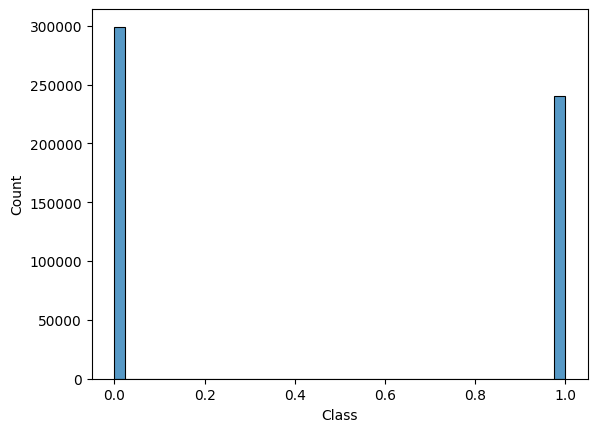

In [10]:
sns.histplot(df, x = 'Class')
plt.show()

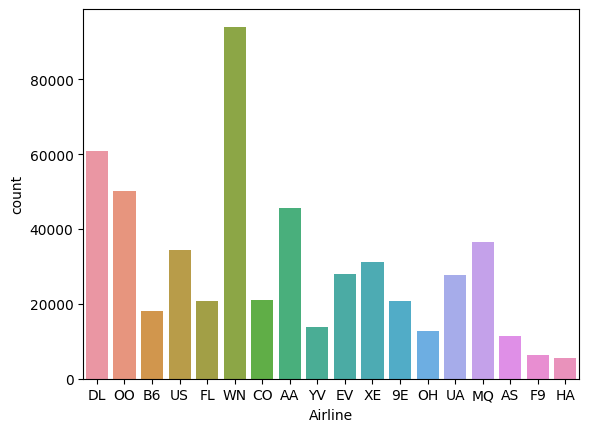

In [11]:
sns.countplot(data=df, x='Airline')
plt.show()

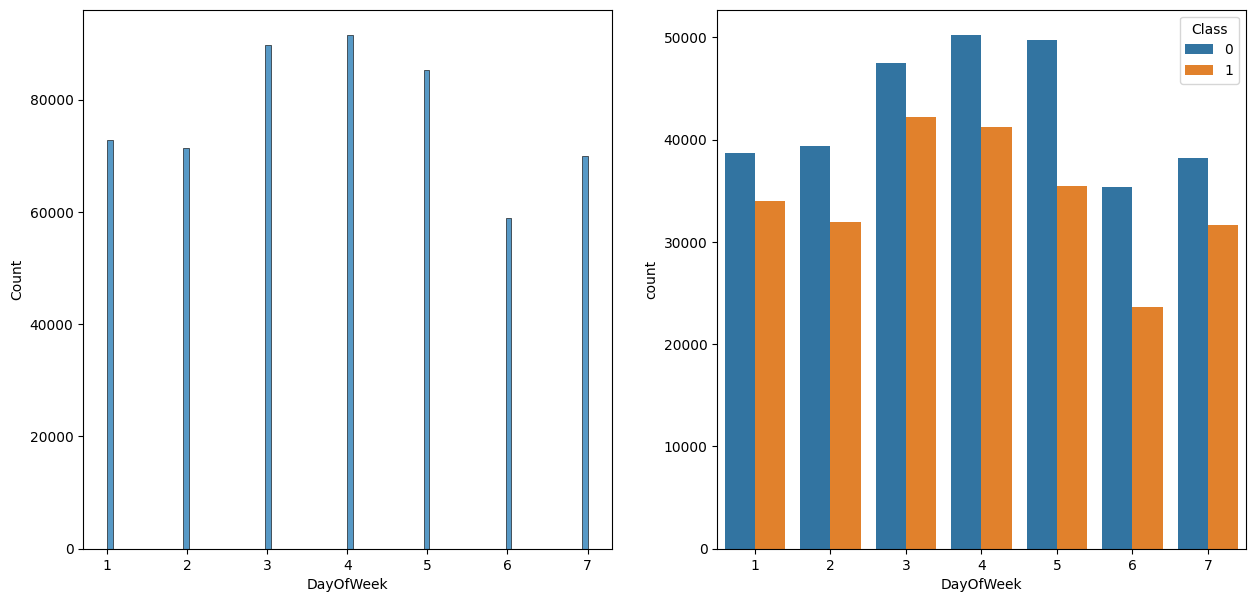

In [12]:
fig, axes = plt.subplots(1,2, figsize=(15,7))
sns.histplot(data=df, x='DayOfWeek', ax=axes[0])
sns.countplot(data=df, x='DayOfWeek', hue='Class', ax=axes[1])
plt.show()

In [13]:
df.Time.describe()

count    539382.000000
mean        802.728161
std         278.045546
min          10.000000
25%         565.000000
50%         795.000000
75%        1035.000000
max        1439.000000
Name: Time, dtype: float64

In [14]:
(df['Time']/60).describe()

count    539382.000000
mean         13.378803
std           4.634092
min           0.166667
25%           9.416667
50%          13.250000
75%          17.250000
max          23.983333
Name: Time, dtype: float64

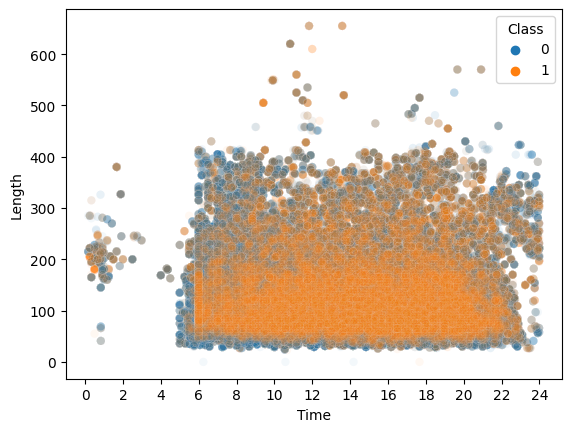

In [15]:
time = df['Time']/60
sns.scatterplot(data=df, x=time, y='Length', hue='Class', alpha=0.05)
plt.xticks(ticks=np.arange(0,25,2))
plt.show()

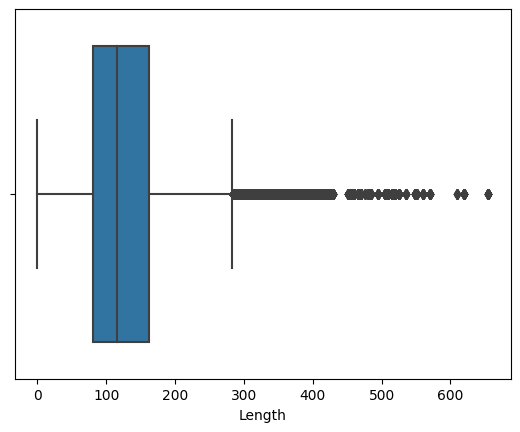

In [16]:
sns.boxplot(data=df, x='Length')
plt.show()

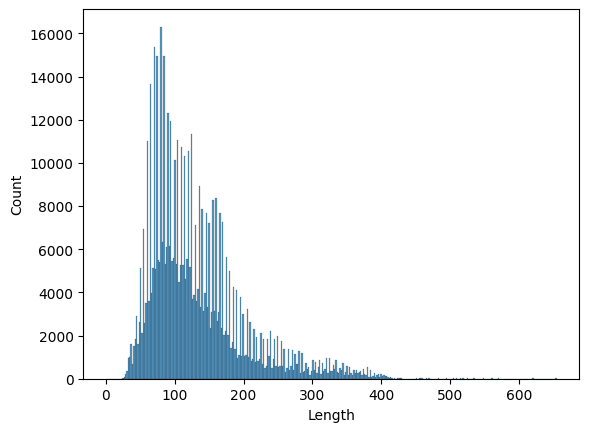

In [17]:
sns.histplot(df, x='Length')
plt.show()

In [18]:
df_model = pd.get_dummies(data=df, columns=['Airline','AirportFrom','AirportTo'])

#### Model with ouliers and without normalization

In [19]:
from sklearn.model_selection import train_test_split
df = pd.read_csv("airlines_delay.csv")

In [20]:
X = df_model.drop(['Class'], axis=1)
y = df_model.Class

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30)

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
model = LogisticRegression()

In [24]:
clf = model.fit(X_train,y_train)

C:\Users\Mikil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
pred = clf.predict(X_test)

In [26]:
clf.score(X_test, y_test)

0.6383153601334858

#### Model with ouliers and with normalization

In [27]:
def normalize(data, column):
    max = data[column].max()
    min = data[column].min()
    norm_df = (data[column] - min)/(max-min)
    return norm_df

In [28]:
df = pd.read_csv("airlines_delay.csv")
df['Length'] = normalize(df, 'Length')
df['Time'] = normalize(df, 'Time')

In [29]:
df_model = pd.get_dummies(data=df, columns=['Airline','AirportFrom','AirportTo'])

In [30]:
X = df_model.drop(['Class'], axis=1)
y = df_model.Class

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30)

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
model = LogisticRegression(max_iter=1000)
clf = model.fit(X_train,y_train)
pred = clf.predict(X_test)
clf.score(X_test, y_test)

0.6384142384822173

#### Model without ouliers and with normalization

In [34]:
df = pd.read_csv("airlines_delay.csv")
t = df.Length.describe()
t

count    539382.000000
mean        132.202104
std          70.117045
min           0.000000
25%          81.000000
50%         115.000000
75%         162.000000
max         655.000000
Name: Length, dtype: float64

In [35]:
upper = (t[6] - t[4]) * 1.5
upper

121.5

In [36]:
df = df[df['Length'] <= 121.5]
df.describe()

,Flight,Time,Length,DayOfWeek,Class
count,293173.000000,293173.000000,293173.000000,293173.000000,293173.000000
mean,2997.363403,812.256309,84.318334,3.907648,0.432216
std,2193.431603,276.499237,21.317767,1.911071,0.495385
min,1.000000,30.000000,0.000000,1.000000,0.000000
25%,1053.000000,580.000000,70.000000,2.000000,0.000000
50%,2650.000000,810.000000,85.000000,4.000000,0.000000
75%,4652.000000,1038.000000,101.000000,5.000000,1.000000
max,7814.000000,1439.000000,121.000000,7.000000,1.000000


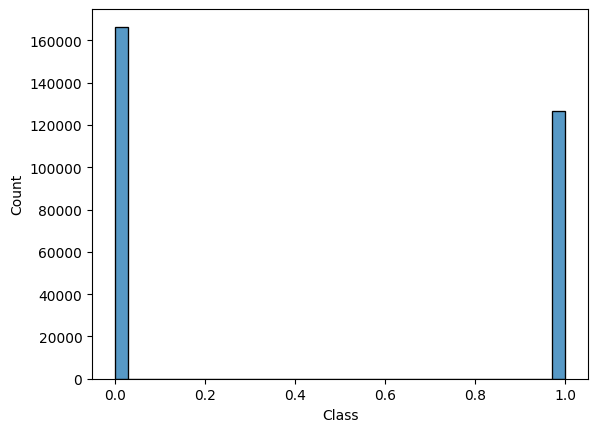

In [37]:
sns.histplot(df, x = 'Class')
plt.show()

In [38]:
def normalize(data, column):
    max = data[column].max()
    min = data[column].min()
    norm_df = (data[column] - min)/(max-min)
    return norm_df

In [39]:
df['Length'] = normalize(df, 'Length')
df['Time'] = normalize(df, 'Time')

In [40]:
df_model = pd.get_dummies(data=df, columns=['Airline','AirportFrom','AirportTo'])
X = df_model.drop(['Class'], axis=1)
y = df_model.Class
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30)

In [41]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
clf = model.fit(X_train,y_train)
pred = clf.predict(X_test)
clf.score(X_test, y_test)

0.6464435146443515